In [1]:
# Name: Günseli Özkan 141044047
import csv
import math
import random
import matplotlib.pyplot as plt
import sys

In [2]:
################################################################################
#                           PROBLEM 1
# Takes a filename and a list of names of columns to extract vote counts from. 
# It should return a list of all of the vote counts from the respective rows. 
# The order of the integers in the returned list does not matter.
# You may assume that the names that are passed in the list do exist as column names 
# in the data file.
################################################################################
def extract_election_vote_counts(filename, column_names):
    input_file = csv.DictReader(open(filename))
    ret = []
    for row in input_file:
        for column_name in column_names:
            if(row[column_name] != ''):
                ret.append(int(row[column_name].replace(',','')))
    return ret

In [3]:
################################################################################
#                           PROBLEM 2
# Write a function ones_and_tens_digit_histogram that takes as input a list of
# numbers and produces as output a list of 10 numbers. Each element of the result 
# indicates the frequency with which that digit appeared in the ones place or the 
# tens place in the input.
################################################################################
def ones_and_tens_digit_histogram(numbers):
    frequency = []
    population = {}
    
    for i in range(10):
        population[i] = 0
    
    for num in numbers:
        digits = get_digits(num)
        if(len(digits) == 0):
            population[0] += 1
        elif(len(digits)==1):
            population[0] += 1
            population[digits[0]] += 1
        else:
            for i in range(2):
                population[digits[i]] += 1
            
    for i in range(10):
        frequency.append(population[i]/(len(numbers)*2))

    return frequency

def get_digits(num):
    digits = []
    while num != 0:
        digits.append(num % 10)
        num = num // 10
    return digits

In [4]:
################################################################################
#                           PROBLEM 3
# Write a function called plot_x_least_digits_histogram that takes a histogram 
# (as created by ones_and_tens_digit_histogram) and graphs the frequencies of the 
# ones and tens digits for the Iranian election data. Save your plot to a file 
# named x-digits.png using pyplot.savefig. The function should return None.
################################################################################
def plot_x_least_digits_histogram(histogram):
    uniform_dist = []
    for i in range(10):
        uniform_dist.append(0.1)
    plt.plot([0,1,2,3,4,5,6,7,8,9], uniform_dist,'b-', label = "Ideal")
    plt.plot([0,1,2,3,4,5,6,7,8,9], histogram,'g-', label = "X")
    plt.legend();
    plt.xlabel('Digit')
    plt.ylabel('Frequency')
    plt.savefig("x-digits.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    plt.show()
    return None
    

In [5]:
################################################################################
#                           PROBLEM 4
# Write a function called plot_distribution_by_sample_size. This function 
# creates 5 different-sized collections of random numbers. Then, it plots the 
# digit histograms for each of those collections. Your function should save 
# your plot as random-digits.png. The function should return None.
################################################################################
def plot_distribution_by_sample_size():
    data1 = []
    data2 = []
    data3 = []
    data4 = []
    data5 = []
    
    uniform_dist = []
    for i in range(10):
        uniform_dist.append(0.1)
        
    for i in range(10):
        data1.append(random.randint(0,99))
    for i in range(50):
        data2.append(random.randint(0,99))
    for i in range(100):
        data3.append(random.randint(0,99))
    for i in range(1000):
        data4.append(random.randint(0,99))
    for i in range(10000):
        data5.append(random.randint(0,99))
    digits = [0,1,2,3,4,5,6,7,8,9]
    plt.plot(digits, uniform_dist, 'cs', label = "Ideal")
    plt.plot(digits, ones_and_tens_digit_histogram(data1), 'r-', label = "10")
    plt.plot(digits, ones_and_tens_digit_histogram(data2), 'g-', label = "50")
    plt.plot(digits, ones_and_tens_digit_histogram(data3), 'b-', label = "100")
    plt.plot(digits, ones_and_tens_digit_histogram(data4), 'y-', label = "1000")
    plt.plot(digits, ones_and_tens_digit_histogram(data5), 'm-', label = "10000")
    plt.legend()
    plt.xlabel('Digit')
    plt.ylabel('Frequency')
    plt.savefig("random-digits.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    return None

In [6]:
################################################################################
#                           PROBLEM 5
# One common measure for the difference/distance between two datasets is the mean 
# squared error. For each corresponding datapoint, compute the difference between 
# the two points, then square it. The overall distance measure is the sum of 
# the squares..
################################################################################
def mean_squared_error(numbers1, numbers2):
    mse = 0
    for i in range(len(numbers1)):
        mse += pow(abs(numbers1[i]-numbers2[i]),2)
    return mse 

In [7]:
################################################################################
#                           PROBLEM 6
# Augment your program with a function called calculate_mse_with_uniform 
# that takes a histogram (as created by ones_and_tens_digit_histogram) and 
# returns the mean squared error of the given histogram with the uniform 
# distribution.
################################################################################
def calculate_mse_with_uniform(histogram):
    uniform_dist = []
    for i in range(10):
        uniform_dist.append(0.1)
    mse = mean_squared_error(histogram,uniform_dist)
    return mse

In [8]:
################################################################################
#                           PROBLEM 6 -CONT
# Augment your program with a function called calculate_mse_with_uniform 
# that takes a histogram (as created by ones_and_tens_digit_histogram) and 
# returns the mean squared error of the given histogram with the uniform 
# distribution.
################################################################################
def compare_x_mse_to_samples(mse):
    largerEq = 0
    smaller = 0
    samples = {}
    
    for i in range(10000):
        samples['l' + str(i)] = []
        for k in range (120):
            samples['l' + str(i)].append(random.randint(1,1000000))
            
    for i in range(10000):
        sampleHist = ones_and_tens_digit_histogram(samples['l'+str(i)])
        sampleMse = calculate_mse_with_uniform(sampleHist)
        diff = mse - sampleMse
        if(diff >= 0):
            largerEq += 1
        else:
            smaller += 1
        
    print("Quantity of MSEs larger than or equal to the 2009 X election MSE: " + str(largerEq))
    print("Quantity of MSEs smaller than the 2009 X election MSE: " + str(smaller))
    p= smaller/100
    print("2009 election null hypothesis rejection level p: " + str(p))
    return None

<ipython-input-4-611181f43877>:17: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  plt.savefig("x-digits.png", dpi=None, facecolor='w', edgecolor='w',
<ipython-input-5-a6692790c06c>:39: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  plt.savefig("random-digits.png", dpi=None, facecolor='w', edgecolor='w',


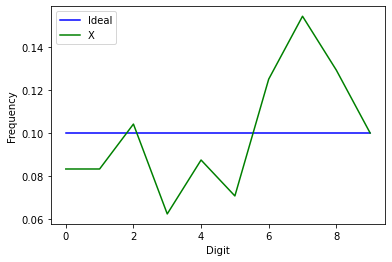

2009 X election MSE: 0.007395833333333335
Quantity of MSEs larger than or equal to the 2009 X election MSE: 9648
Quantity of MSEs smaller than the 2009 X election MSE: 352
2009 election null hypothesis rejection level p: 3.52
2008 United States election MSE: 0.001410025876058068
Quantity of MSEs larger than or equal to the 2009 X election MSE: 530
Quantity of MSEs smaller than the 2009 X election MSE: 9470
2009 election null hypothesis rejection level p: 94.7


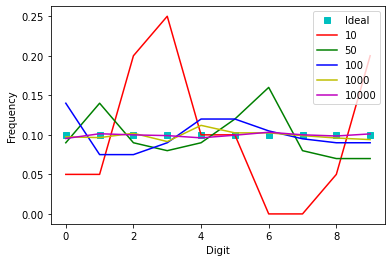

In [9]:
column_names = ["C1", "C2", "C3", "C4"]
votes = extract_election_vote_counts("election-x-2009.csv", column_names)
freq = ones_and_tens_digit_histogram(votes)
plot_x_least_digits_histogram(freq)
plot_distribution_by_sample_size()
print("2009 X election MSE: " + str(calculate_mse_with_uniform(freq)))
compare_x_mse_to_samples(calculate_mse_with_uniform(freq))
column_names = ["Obama", "McCain", "Nader", "Barr", "Baldwin", "McKinney"]
votes = extract_election_vote_counts("election-us-2008.csv", column_names)
freq = ones_and_tens_digit_histogram(votes)
print("2008 United States election MSE: " + str(calculate_mse_with_uniform(freq)))
compare_x_mse_to_samples(calculate_mse_with_uniform(freq))